# **POSTGRES ENTREGA PYTHON**

## **Importacion de librerias**

In [38]:
import psycopg2
from psycopg2 import Error
import csv
import pandas as pd
from sqlalchemy import create_engine
import requests
from io import StringIO
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

## **Creacion de conexion y cursor**

In [46]:
connection = psycopg2.connect(
    database="myname_db",
    user="myname_user",
    password="password",
    host="localhost",  # o (127.0.0.1)
    port="5432",
)

In [47]:
cursor = connection.cursor()

In [46]:
connection.close()

In [ ]:
connection.rollback()

In [ ]:
#NOTAS
#cursor.execute(sql [, optional parameters]) HACER SOLICITUD
#cursor.executemany(sql, seq_of_parameters) EJECUTA SQL CON VARIOS PARÁMETROS.
#connection.commit() GUARDA LOS CAMBIOS
#connection.rollback() REVIERTE CAMBIOS DESDE EL ULTIMO COMMIT
#connection.close() CIERRA CONEXION SIN GUARDAR

#### **I) Crear la tabla nombrada: employees y explicar que tarea realiza la consulta realizada y mostrar en pantalla la tabla**

In [8]:
cursor.execute(
    """
CREATE TABLE employees
   ( employee_id INTEGER
   , first_name VARCHAR(20)
   , last_name VARCHAR(25)
   , email VARCHAR(25)
   , phone_number VARCHAR(20)
   , hire_date DATE
   , job_id VARCHAR(10)
   , salary NUMERIC(8,2)
   , commission_pct NUMERIC(2,2)
   , manager_id INTEGER
   , department_id INTEGER
   ) ;    
"""
)
cursor.execute(
    """
CREATE UNIQUE INDEX emp_emp_id_pk
         ON employees (employee_id) ;
ALTER TABLE employees ADD
   PRIMARY KEY (employee_id);
"""
)
cursor.execute(
    """
SELECT * FROM employees LIMIT 10;
SELECT count(1) FROM employees;
"""
)

connection.commit()

#### **II) Crear la tabla courses con las siguientes columnas:**

In [42]:
cursor.execute(
    """
CREATE TABLE IF NOT EXISTS courses (
    course_id SERIAL PRIMARY KEY,
    course_name TEXT NOT NULL CHECK(length(course_name) <= 60),
    course_author TEXT NOT NULL CHECK(length(course_author) <= 40),
    course_status TEXT NOT NULL CHECK(course_status IN ('published', 'draft', 'inactive')),
    course_published_dt DATE
);
"""
)
connection.commit()

#### **III) Insertar datos:**

In [43]:
datacourses = r"C:\Users\Jesus David\Desktop\POSTGRES\Entregablepy\datacourses.csv" #la ruta cambia

# Preparar la sentencia SQL para insertar datos
sentencia_sql = """
INSERT INTO courses (course_name, course_author, course_status, course_published_dt)
VALUES (%s, %s, %s, %s);
"""

with open(datacourses, "r") as archivo:
    
    lector_csv = csv.reader(archivo)

    for fila in lector_csv:
        
        
        datos = [fila[0], fila[1], fila[2], fila[3] if fila[3] else None]

        
        cursor.execute(sentencia_sql, datos)


connection.commit()

#### **IV) Borre todos los cursos que no estén en modo borrador ni publicados. Proporcione la sentencia de borrado como respuesta para este ejercicio en el Jupyter Book. Para validar, obtenga el recuento de todos los cursos publicados por autor y asegúrese de que la salida está ordenada en forma descendente por recuento.**

In [51]:


delete_query = """
    DELETE FROM courses
    WHERE course_status NOT IN ('draft', 'published');
    """
cursor.execute(delete_query)
connection.commit()
print("Se han eliminado los cursos que no están en modo borrador ni publicados.")

Se han eliminado los cursos que no están en modo borrador ni publicados.

Recuento de cursos publicados por autor (ordenados por recuento descendente):
Autor: Bob Dillon, Cursos Publicados: 4
Autor: Elvis Presley, Cursos Publicados: 1
Autor: Uncle Sam, Cursos Publicados: 1


In [54]:
select_query = """
    SELECT course_author, COUNT(*) AS num_published_courses
    FROM courses
    WHERE course_status = 'published'
    GROUP BY course_author
    ORDER BY num_published_courses DESC;
    """
tabla1 = pd.read_sql_query(select_query,connection)    
tabla1

C:\Users\Jesus David\AppData\Local\Temp\ipykernel_5028\3152187163.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,course_author,num_published_courses
0,Bob Dillon,4
1,Elvis Presley,1
2,Uncle Sam,1


#### **VI) Crear la base de datos users:**

In [50]:
cursor.execute(
    """
CREATE TABLE users(
    user_id SERIAL PRIMARY KEY,
    user_first_name VARCHAR(30),
    user_last_name VARCHAR(30),
    user_email_id VARCHAR(50),
    user_gender VARCHAR(1),
    user_unique_id VARCHAR(15),
    user_phone_no VARCHAR(20),
    user_dob DATE,
    created_ts TIMESTAMP
)
"""
)

cursor.execute(
    """
insert into users (
    user_first_name, user_last_name, user_email_id, user_gender, 
    user_unique_id, user_phone_no, user_dob, created_ts
) VALUES
    ('Giuseppe', 'Bode', 'gbode0@imgur.com', 'M', '88833-8759', 
     '+86 (764) 443-1967', '1973-05-31', '2018-04-15 12:13:38'),
    ('Lexy', 'Gisbey', 'lgisbey1@mail.ru', 'F', '262501-029', 
     '+86 (751) 160-3742', '2003-05-31', '2020-12-29 06:44:09'),
    ('Karel', 'Claringbold', 'kclaringbold2@yale.edu', 'F', '391-33-2823', 
     '+62 (445) 471-2682', '1985-11-28', '2018-11-19 00:04:08'),
    ('Marv', 'Tanswill', 'mtanswill3@dedecms.com', 'F', '1195413-80', 
     '+62 (497) 736-6802', '1998-05-24', '2018-11-19 16:29:43'),
    ('Gertie', 'Espinoza', 'gespinoza4@nationalgeographic.com', 'M', '471-24-6869', 
     '+249 (687) 506-2960', '1997-10-30', '2020-01-25 21:31:10'),
    ('Saleem', 'Danneil', 'sdanneil5@guardian.co.uk', 'F', '192374-933', 
     '+63 (810) 321-0331', '1992-03-08', '2020-11-07 19:01:14'),
    ('Rickert', 'O''Shiels', 'roshiels6@wikispaces.com', 'M', '749-27-47-52', 
     '+86 (184) 759-3933', '1972-11-01', '2018-03-20 10:53:24'),
    ('Cybil', 'Lissimore', 'clissimore7@pinterest.com', 'M', '461-75-4198', 
     '+54 (613) 939-6976', '1978-03-03', '2019-12-09 14:08:30'),
    ('Melita', 'Rimington', 'mrimington8@mozilla.org', 'F', '892-36-676-2', 
     '+48 (322) 829-8638', '1995-12-15', '2018-04-03 04:21:33'),
    ('Benetta', 'Nana', 'bnana9@google.com', 'M', '197-54-1646', 
     '+420 (934) 611-0020', '1971-12-07', '2018-10-17 21:02:51'),
    ('Gregorius', 'Gullane', 'ggullanea@prnewswire.com', 'F', '232-55-52-58', 
     '+62 (780) 859-1578', '1973-09-18', '2020-01-14 23:38:53'),
    ('Una', 'Glayzer', 'uglayzerb@pinterest.com', 'M', '898-84-336-6', 
     '+380 (840) 437-3981', '1983-05-26', '2019-09-17 03:24:21'),
    ('Jamie', 'Vosper', 'jvosperc@umich.edu', 'M', '247-95-68-44', 
     '+81 (205) 723-1942', '1972-03-18', '2020-07-23 16:39:33'),
    ('Calley', 'Tilson', 'ctilsond@issuu.com', 'F', '415-48-894-3', 
     '+229 (698) 777-4904', '1987-06-12', '2020-06-05 12:10:50'),
    ('Peadar', 'Gregorowicz', 'pgregorowicze@omniture.com', 'M', '403-39-5-869', 
     '+7 (267) 853-3262', '1996-09-21', '2018-05-29 23:51:31'),
    ('Jeanie', 'Webling', 'jweblingf@booking.com', 'F', '399-83-05-03', 
     '+351 (684) 413-0550', '1994-12-27', '2018-02-09 01:31:11'),
    ('Yankee', 'Jelf', 'yjelfg@wufoo.com', 'F', '607-99-0411', 
     '+1 (864) 112-7432', '1988-11-13', '2019-09-16 16:09:12'),
    ('Blair', 'Aumerle', 'baumerleh@toplist.cz', 'F', '430-01-578-5', 
     '+7 (393) 232-1860', '1979-11-09', '2018-10-28 19:25:35'),
    ('Pavlov', 'Steljes', 'psteljesi@macromedia.com', 'F', '571-09-6181', 
     '+598 (877) 881-3236', '1991-06-24', '2020-09-18 05:34:31'),
    ('Darn', 'Hadeke', 'dhadekej@last.fm', 'M', '478-32-02-87', 
     '+370 (347) 110-4270', '1984-09-04', '2018-02-10 12:56:00'),
    ('Wendell', 'Spanton', 'wspantonk@de.vu', 'F', null, 
     '+84 (301) 762-1316', '1973-07-24', '2018-01-30 01:20:11'),
    ('Carlo', 'Yearby', 'cyearbyl@comcast.net', 'F', null, 
     '+55 (288) 623-4067', '1974-11-11', '2018-06-24 03:18:40'),
    ('Sheila', 'Evitts', 'sevittsm@webmd.com', null, '830-40-5287',
     null, '1977-03-01', '2020-07-20 09:59:41'),
    ('Sianna', 'Lowdham', 'slowdhamn@stanford.edu', null, '778-0845', 
     null, '1985-12-23', '2018-06-29 02:42:49'),
    ('Phylys', 'Aslie', 'paslieo@qq.com', 'M', '368-44-4478', 
     '+86 (765) 152-8654', '1984-03-22', '2019-10-01 01:34:28')
"""
)

connection.commit()

#### **VII) Obtenga el número de usuarios creados por año. Utilice la tabla de usuarios para este ejercicio:**

- La salida debe contener el año de 4 dígitos y el recuento.

- Use funciones específicas de fecha para obtener el año usando created_ts.

- Asegúrese de definir alias a las columnas como created_year y user_count respectivamente.

- Los datos deben ordenarse de forma ascendente por created_year.

- Cuando ejecutes la consulta usando el entorno Jupyter, puede que tenga decimales para los enteros. Por lo tanto, puede mostrar los resultados incluso con decimales.



In [55]:
query1="""
    SELECT EXTRACT(YEAR FROM created_ts) AS created_year,
           COUNT(*) AS user_count
    FROM users
    GROUP BY created_year
    ORDER BY created_year ASC;
    """

tabla2 = pd.read_sql_query(query1,connection)
tabla2

C:\Users\Jesus David\AppData\Local\Temp\ipykernel_5028\1116862925.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,created_year,user_count
0,2018.0,13
1,2019.0,4
2,2020.0,8


#### **VIII) Obtenga los días de nacimiento de todos los usuarios nacidos en el mes May.**

- Utilice la tabla users para este ejercicio.

- La salida debe contener user_id, user_dob, user_email_id y user_day_of_birth.

- Utilice funciones específicas de fecha para obtener el mes utilizando user_dob.

- user_day_of_birth debe ser un día completo con el primer carácter en mayúsculas, por ejemplo Tuesday.

- Los datos deben ordenarse por día dentro del mes May.

In [57]:
query2 = """
    SELECT user_id,
           user_dob,
           user_email_id,
           TO_CHAR(user_dob, 'Day') AS user_day_of_birth
    FROM users
    WHERE EXTRACT(MONTH FROM user_dob) = 5
    ORDER BY EXTRACT(DAY FROM user_dob);
    """

tabla3 = pd.read_sql_query(query2,connection)
tabla3

C:\Users\Jesus David\AppData\Local\Temp\ipykernel_5028\1398061144.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,user_id,user_dob,user_email_id,user_day_of_birth
0,4,1998-05-24,mtanswill3@dedecms.com,Sunday
1,12,1983-05-26,uglayzerb@pinterest.com,Thursday
2,1,1973-05-31,gbode0@imgur.com,Thursday
3,2,2003-05-31,lgisbey1@mail.ru,Saturday


#### **X) Obtenga el número de usuarios por género. Utilice la tabla de users para este ejercicio.**

- La salida debe contener el gender y user_count.

- Para los hombres la salida debe mostrar Male y para las mujeres la salida debe mostrar Female.

- Si no se especifica el sexo, se mostrará Not Specified

- Los datos deben ordenarse en forma descendente por user_count.

In [53]:
query6 = """
    SELECT
        CASE
            WHEN user_gender = 'M' THEN 'Male'
            WHEN user_gender = 'F' THEN 'Female'
            ELSE 'Not Specified'
        END AS gender,
        COUNT(*) AS user_count
    FROM users
    GROUP BY user_gender
    ORDER BY user_count DESC;
    """

tabla6 = pd.read_sql_query(query6,connection)
tabla6

C:\Users\Jesus David\AppData\Local\Temp\ipykernel_5028\3631390477.py:14: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,gender,user_count
0,Female,13
1,Male,10
2,Not Specified,2


#### **XII) Obtenga los 4 últimos dígitos de los ids únicos:**



- Utilice la tabla users para este ejercicio.

- El resultado debe contener user_id, user_unique_id y user_unique_id_last4.

- Los identificadores únicos son null o not null.

- Los identificadores únicos contienen números y guiones y son de diferente longitud.

- Necesitamos obtener los últimos 4 dígitos descartando los guiones sólo cuando el número de dígitos es al menos 9.

- Si el identificador único es nulo, debe mostrarse Not Specified.

- Después de descartar los guiones, si el identificador único tiene menos de 9 dígitos, debe mostrar Invalid Unique Id.

- Los datos deben ordenarse por user_id. Es posible que aparezca None o null para aquellos identificadores de usuario en los que no haya un identificador único para user_unique_id.

In [50]:
query7 = """
    SELECT
        user_id,
        COALESCE(user_unique_id, 'Not Specified') AS user_unique_id,
        CASE
            WHEN user_unique_id IS NULL THEN 'Not Specified'
            WHEN LENGTH(REGEXP_REPLACE(user_unique_id, '-', '')) < 9 THEN 'Invalid Unique Id'
            ELSE RIGHT(REGEXP_REPLACE(user_unique_id, '-', ''), 4)
        END AS user_unique_id_last4
    FROM users
    ORDER BY user_id;
    """

tabla7 = pd.read_sql_query(query7, connection)
tabla7

C:\Users\Jesus David\AppData\Local\Temp\ipykernel_5028\3326471635.py:14: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,user_id,user_unique_id,user_unique_id_last4
0,1,88833-8759,8759
1,2,262501-029,1029
2,3,391-33-2823,2823
3,4,1195413-80,1380
4,5,471-24-6869,6869
5,6,192374-933,4933
6,7,749-27-47-52,7-52
7,8,461-75-4198,4198
8,9,892-36-676-2,76-2
9,10,197-54-1646,1646


#### **XIII) Obtenga el recuento de usuarios en función del código de país:**

- Utilice la tabla users para este ejercicio.

- La salida debe contener el código de país y el recuento.

- No debe haber ningún + en el código de país. Sólo debe contener dígitos.

- Los datos deben ordenarse como números por código de país.

- Debemos descartar user_phone_no con valores null.

In [51]:
query8 = """
SELECT
    country_code,
    COUNT(*) AS number_of_people
FROM (
    SELECT
        CAST(
            CASE
                WHEN POSITION(' ' IN SUBSTRING(user_phone_no FROM 2)) > 0 THEN
                    SUBSTRING(user_phone_no FROM 2 FOR POSITION(' ' IN SUBSTRING(user_phone_no FROM 2)) - 1)
                WHEN POSITION('(' IN SUBSTRING(user_phone_no FROM 2)) > 0 THEN
                    SUBSTRING(user_phone_no FROM 2 FOR POSITION('(' IN SUBSTRING(user_phone_no FROM 2)) - 1)
                ELSE
                    SUBSTRING(user_phone_no FROM 2 FOR 3)
            END AS INTEGER
        ) AS country_code
    FROM
        users
    WHERE
        user_phone_no IS NOT NULL AND
        user_phone_no LIKE '+%'
) AS extracted_codes
GROUP BY
    country_code
ORDER BY
    country_code
"""
tabla8 = pd.read_sql_query(query8, connection)
tabla8

C:\Users\Jesus David\AppData\Local\Temp\ipykernel_5028\3525124208.py:28: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,country_code,number_of_people
0,1,1
1,7,2
2,48,1
3,54,1
4,55,1
5,62,3
6,63,1
7,81,1
8,84,1
9,86,4


In [ ]:
connection.close()
cursor.close()

### **XIV)** Importe los datos del precio de Cardano USD (ADA-USD) en su instancia de base de datos Docker, teniendo en cuenta lo explicado durante esta sección. Luego dibuje un gráfico de candlestick para la criptomoneda. En el siguiente link encontrará el CSV de Cardano: Cardano USD (ADA-USD). Describa lo que puede observar en la serie de tiempo. Realice un análisis exploratorio de datos (EDA) para la serie de tiempo.

In [84]:
cursor.execute(
    """
CREATE TABLE cordanoUSD (
    Date DATE,
    Open FLOAT,
    High FLOAT,
    Low FLOAT,
    Close FLOAT,
    Adj_Close FLOAT,
    Volume NUMERIC
);
"""
)
connection.commit()

In [7]:
try:
    # Descargar el archivo CSV desde el enlace
    url = "https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/ADA-USD.csv"
    response = requests.get(url)

    # Leer el contenido del archivo CSV
    csv_data = response.text

    # Crear un objeto StringIO para leer el contenido como un archivo
    csv_file = StringIO(csv_data)

    # Crear un objeto para leer el archivo CSV
    df = pd.read_csv(csv_file)

    # Preparar la sentencia SQL para insertar datos
    sentencia_sql = """
    INSERT INTO cordanousd (Date, Open, High, Low, Close, Adj_Close, Volume)
    VALUES (%s, %s, %s, %s, %s, %s, %s);
    """

    # Iterar sobre cada fila del DataFrame y ejecutar la sentencia SQL para insertar los datos
    for index, row in df.iterrows():
        datos = (
            row["Date"],
            row["Open"],
            row["High"],
            row["Low"],
            row["Close"],
            row["Adj Close"],
            row["Volume"],
        )
        cursor.execute(sentencia_sql, datos)

    # Hacer commit para guardar los cambios en la base de datos
    # connection.commit()
    print("Los datos se importaron correctamente.")

except psycopg2.Error as error:
    connection.rollback()
    print("Error al importar los datos:", error)

Los datos se importaron correctamente.


#### **Descripcion de los datos:**

Los datos analizados pertenecen a la criptomoneda **Cardano USD (ADA-USD)**, iniciando en octubre de 2017. A continuación, se detallan las columnas presentes en el conjunto de datos:

- **Fecha**: El día específico al cual pertenecen los datos.
- **Apertura (Open)**: El valor de apertura del activo ese día.
- **Máximo (High)**: El valor más alto alcanzado por el activo durante el día.
- **Mínimo (Low)**: El valor más bajo registrado por el activo en el día.
- **Cierre (Close)**: El valor del activo al cierre del mercado.
- **Cierre Ajustado (Adj Close)**: El valor de cierre ajustado, que podría considerar variables como dividendos o splits de acciones, si aplica.
- **Volumen (Volume)**: La cantidad total de activos negociados durante el día.

Por ejemplo, el registro del **1 de octubre de 2017**, muestra un valor de apertura de aproximadamente **0.0217**, alcanzando un máximo de **0.0322** y un mínimo de **0.01735** a lo largo del día, para cerrar en **0.02497**. El volumen de transacciones ese día fue de alrededor de **50,068,700** unidades.

La importancia de este conjunto de datos radica en su capacidad para ofrecer una visión detallada de la actividad diaria de Cardano USD, proporcionando a analistas financieros, inversionistas y entusiastas del mercado una herramienta valiosa para identificar tendencias, soportes y resistencias en el precio de esta criptomoneda.

#### **EDA:**

In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


In [23]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [17]:
datos_faltantes = df.isnull().sum()
print(datos_faltantes)

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64


#### **Limpieza**

In [28]:
dataclean = df.dropna(how="any")
dataclean

In [30]:
datos_faltantes1 = dataclean.isnull().sum()
print(datos_faltantes1)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### **Summary**

In [35]:
dataclean["Date"] = pd.to_datetime(dataclean["Date"], format="%Y-%m-%d")
resumen_completo = dataclean.describe()
print(resumen_completo)

                                Date         Open         High          Low  \
count                           1471  1471.000000  1471.000000  1471.000000   
mean   2019-10-07 02:47:23.779741696     0.374234     0.393359     0.354385   
min              2017-10-01 00:00:00     0.018414     0.021050     0.017354   
25%              2018-10-03 12:00:00     0.047560     0.049503     0.046073   
50%              2019-10-06 00:00:00     0.093398     0.096776     0.090105   
75%              2020-10-09 00:00:00     0.301339     0.318211     0.283567   
max              2021-10-14 00:00:00     2.966390     3.099186     2.907606   
std                              NaN     0.609602     0.639195     0.578952   

             Close    Adj Close        Volume  
count  1471.000000  1471.000000  1.471000e+03  
mean      0.375726     0.375726  1.090947e+09  
min       0.018539     0.018539  1.739460e+06  
25%       0.047592     0.047592  5.366896e+07  
50%       0.093434     0.093434  1.359691e+08  


C:\Users\Jesus David\AppData\Local\Temp\ipykernel_5028\2559787383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Date'] = pd.to_datetime(dataclean['Date'], format='%Y-%m-%d')


## Analisis del Sumamry
Los siguientes son los principales indicadores estadísticos del conjunto de datos:

- **Cantidad de Registros**: Hay un total de 1471 registros que cubren las transacciones diarias.
- **Promedio**:
  - **Apertura (Open)**: $0.374
  - **Máximo (High)**: $0.393
  - **Mínimo (Low)**: $0.354
  - **Cierre (Close)**: $0.376
  - **Volumen de Transacciones**: Aproximadamente 1,090,947,000 unidades.
- **Desviación Estándar** (que muestra la variabilidad):
  - **Apertura (Open)**, **Máximo (High)**, **Mínimo (Low)**, y **Cierre (Close)**: Varía entre $0.578 y $0.639, indicando una variabilidad significativa en los precios a lo largo del tiempo.
  - **Volumen de Transacciones**: 2,258,370,000, lo que refleja una amplia variabilidad en el volumen de transacciones diarias.
- **Valores Mínimos**:
  - Se observaron valores mínimos en todas las categorías por debajo de $0.021, indicando los días de menor valoración de la criptomoneda.
- **Valores Máximos**:
  - Se registraron máximos superiores a $2.9, destacando los picos de valoración dentro del período analizado.
- **Cuartiles**:
  - **25%** de los días, los valores estuvieron por debajo de $0.047, mostrando los periodos de baja valoración.
  - **50%** (Mediana) refleja un mercado más estable con valores cercanos a $0.093.
  - **75%** de los registros muestran valores por encima de $0.301, indicando los periodos de alta valoración.

## Observaciones Clave

1. **Volatilidad**: La variabilidad en los precios y el volumen de transacciones resalta la **volatilidad** característica de ADA-USD. Esta volatilidad refleja la influencia de factores externos y cambios en el sentimiento del mercado, comunes en el ecosistema de las criptomonedas.

2. **Crecimiento**: A pesar de la volatilidad, los datos indican un **crecimiento a largo plazo** en el valor de Cardano. Esto sugiere que, a lo largo del tiempo, ADA-USD ha experimentado períodos de apreciación significativa, posiblemente ofreciendo oportunidades de inversión atractivas a largo plazo.

3. **Actividad del Mercado**: La amplia variabilidad en el **volumen de transacciones** sugiere períodos de intensa actividad comercial, asociados tanto con aumentos como con disminuciones en el precio, lo que puede señalar eventos de mercado significativos que afectan a Cardano.

4. **Potencial de Inversión**: Este análisis proporciona una **perspectiva valiosa** para inversionistas y analistas interesados en Cardano. Aunque invertir en criptomonedas implica riesgos, especialmente por la volatilidad, ADA-USD ha mostrado potencial de crecimiento a lo largo del tiempo.

#### **Correlacion**

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.566310  0.564018  0.570708  0.567588   0.567588   
Open       0.566310  1.000000  0.998109  0.997103  0.996772   0.996772   
High       0.564018  0.998109  1.000000  0.996368  0.998885   0.998885   
Low        0.570708  0.997103  0.996368  1.000000  0.997776   0.997776   
Close      0.567588  0.996772  0.998885  0.997776  1.000000   1.000000   
Adj Close  0.567588  0.996772  0.998885  0.997776  1.000000   1.000000   
Volume     0.569823  0.721066  0.737958  0.704332  0.728244   0.728244   

             Volume  
Date       0.569823  
Open       0.721066  
High       0.737958  
Low        0.704332  
Close      0.728244  
Adj Close  0.728244  
Volume     1.000000  


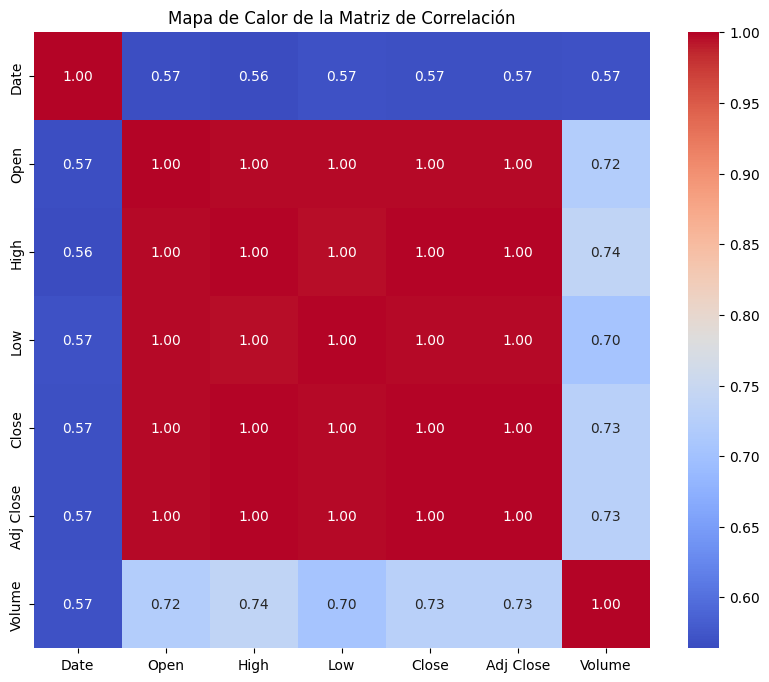

In [39]:
matriz_correlacion = dataclean.corr()
print(matriz_correlacion)

# Creando el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True
)

# Añadiendo títulos y etiquetas (opcional)
plt.title("Mapa de Calor de la Matriz de Correlación")
plt.show()

## Correlaciones Observadas:

- **Precios entre sí (Open, High, Low, Close, Adj Close)**: Las correlaciones son extremadamente altas (mayores a 0.99 en la mayoría de los casos), lo cual indica que estos precios se mueven muy en conjunto a lo largo del tiempo. Esto es esperado, ya que en el mercado de criptomonedas, los movimientos de precios dentro de un día suelen estar muy interconectados.

- **Fecha con otras variables**: La correlación entre la fecha y las variables de precios y volumen muestra una relación moderada (alrededor de 0.56 a 0.57), sugiriendo que ha habido una tendencia a lo largo del tiempo en el comportamiento de los precios y el volumen de transacciones.

- **Volumen con precios**: El volumen de transacciones muestra correlaciones significativas con los precios de apertura, máximo, mínimo, y cierre (de 0.72 a 0.74 aproximadamente). Esto indica que hay una relación entre la cantidad de actividad comercial y los movimientos de precios, lo cual podría sugerir que días con mayor volumen de transacciones tienden a tener movimientos de precios más pronunciados.

## Implicaciones:

Estas correlaciones altas entre las variables de precios sugieren que el comportamiento del mercado es consistente a través de diferentes medidas de precios en un mismo día. La relación moderada entre la fecha y otras variables puede indicar tendencias a largo plazo en el precio y volumen de ADA-USD. La correlación entre el volumen y los precios destaca la influencia de la actividad del mercado en los movimientos de precios.

Este tipo de análisis es fundamental para inversores y analistas que buscan entender las dinámicas del mercado de criptomonedas, especialmente para aquellos interesados en ADA-USD, ofreciendo insights valiosos sobre cómo diferentes aspectos del mercado están interrelacionados.

#### **Gafico CandleStick:**

In [41]:
fig = go.Figure(
    data=[
        go.Candlestick(
            x=dataclean.index,
            open=dataclean["Open"],
            high=dataclean["High"],
            low=dataclean["Low"],
            close=dataclean["Close"],
        )
    ]
)

fig.update_layout(title="Gráfico de Velas:", xaxis_title="Fecha", yaxis_title="Precio")
fig.show()

## Análisis de Gráfico de Velas

### Periodos de Volatilidad
Se identifican por velas con cuerpos grandes y sombras extensas, lo que implica fluctuaciones notables entre los precios altos y bajos, así como diferencias significativas entre los precios de apertura y cierre.

### Periodos de Estabilidad
Caracterizados por velas más pequeñas y sombras cortas, indicando menor volatilidad y un mercado más tranquilo.

Un indicador técnico, posiblemente un promedio móvil, se observa en la parte inferior del gráfico, ayudando a identificar la dirección general de la tendencia.

## Patrones Observados y Estrategias Sugeridas

### Tendencia Alcista
Un patrón de velas crecientes sugiere una fuerte presión de compra. Los inversores podrían considerar entrar en posiciones largas o agregar a posiciones existentes durante estos períodos.

### Posible Cambio de Tendencia
Una secuencia de velas decrecientes puede señalar un cambio de tendencia o corrección de precio. Los traders podrían tomar esto como una señal para cerrar posiciones largas o iniciar posiciones cortas.

## Acciones Sugeridas

### Estrategias de Seguimiento de Tendencia
Utilizar indicadores como medias móviles para confirmar la tendencia y mantener posiciones mientras la tendencia persista.

### Gestión de Riesgos
Establecer órdenes de stop-loss durante periodos de alta volatilidad para proteger las inversiones contra movimientos de precios inesperados.

### Aprovechamiento de Correcciones
- Observar señales de sobreventa para entrar en el mercado en posiciones largas si se espera una recuperación del precio.

- La combinación de un análisis técnico riguroso con una gestión de riesgos prudente puede ayudar a los inversores a tomar decisiones más informadas y potencialmente rentables.